# Problem 8: Linear Regression

This project aims to use a Linear Regression model to predict the number of customer purchases in a store. The data we use in this question includes information about the purchases of a store's customers and their personality traits ("marketing campaign" dataset).

## Packages

In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset

In [216]:
# Read the dataset
data = './marketing_campaign.csv'
df = pd.read_csv(data)

## Explanatory Data Analysis
In this part, we draw necessary charts to gain a better understanding of the data and analyze them. We address:

+ Proportion of missing data for each feature
+ Scatter plot and histogram for features
+ Examining the dependency between features and also each feature with the target column

and more...

In [217]:
df.shape

(2240, 20)

There are 2240 instances of data each with 19 features each (last column being the label).

In [218]:
df

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoffee,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebVisitsMonth,Complain,NumPurchases,UsedCampaignOffer
0,0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635.0,88,546,172,88,88.0,NaN,0,25,1
1,1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,NaN,1,6,2,1,6.0,5.0,0,6,0
2,2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,NaN,49,127,111,21,42.0,NaN,0,21,0
3,3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11.0,4,20,10,3,5.0,6.0,0,8,0
4,4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173.0,43,118,46,27,15.0,5.0,0,19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709.0,43,182,42,118,247.0,5.0,0,18,0
2236,2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406.0,0,30,0,0,8.0,7.0,0,22,1
2237,2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908.0,48,217,32,12,24.0,6.0,0,19,1
2238,2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428.0,30,214,80,30,61.0,NaN,0,23,0


In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2240 non-null   int64  
 1   ID                 2240 non-null   int64  
 2   Year_Birth         2240 non-null   int64  
 3   Education          2240 non-null   object 
 4   Marital_Status     2240 non-null   object 
 5   Income             2017 non-null   float64
 6   Kidhome            2240 non-null   int64  
 7   Teenhome           2240 non-null   int64  
 8   Dt_Customer        2240 non-null   object 
 9   Recency            2240 non-null   int64  
 10  MntCoffee          2035 non-null   float64
 11  MntFruits          2240 non-null   int64  
 12  MntMeatProducts    2240 non-null   int64  
 13  MntFishProducts    2240 non-null   int64  
 14  MntSweetProducts   2240 non-null   int64  
 15  MntGoldProds       2227 non-null   float64
 16  NumWebVisitsMonth  2040 

In [220]:
df.NumPurchases.unique()

array([25,  6, 21,  8, 19, 22, 10,  2,  4, 16, 15,  5, 26,  9, 13, 12, 43,
       17, 20, 14, 27, 11, 18, 28,  7, 24, 29, 23, 32, 30, 37, 31, 33, 35,
       39,  1, 34,  0, 44])

These are the target values of the training set.

Now we can take look at the data visually. Since, there are more than two features, we will plot scatter plots of each feature. Later, using these visuals, we will determine which feature is best single best feature for the task of regression using a simple (single-variable) linear regression model.

In [221]:
# Separate the features from the target variable
column_names = np.delete(df.columns.to_numpy(), 18)
print(column_names)
data = df.to_numpy()
X = np.delete(data, 18, axis=1)
Y = data[:, 18].reshape(-1).astype(int)
X.shape

['Unnamed: 0' 'ID' 'Year_Birth' 'Education' 'Marital_Status' 'Income'
 'Kidhome' 'Teenhome' 'Dt_Customer' 'Recency' 'MntCoffee' 'MntFruits'
 'MntMeatProducts' 'MntFishProducts' 'MntSweetProducts' 'MntGoldProds'
 'NumWebVisitsMonth' 'Complain' 'UsedCampaignOffer']


(2240, 19)

In [222]:
def visualize_scatter(X, Y, column_names):
    plt.style.use("bmh")

    # Create scatterplots
    num_features = X.shape[1]
    plt.figure(figsize=(20, 25)) 
    
    # Loop through each feature
    plot_count = 1
    for feature1 in range(num_features):
        plt.subplot(num_features // 4 + 1, 4, plot_count)
        plt.scatter(X[:, feature1], Y)
        plt.title(f'{column_names[feature1]} vs number of purchases')
        plt.xlabel(column_names[feature1])
        plt.ylabel("Number of Purchases")
        # plt.legend()
        plt.grid(True)
        plot_count += 1
    
    plt.tight_layout()
    # plt.savefig("datarange.png", dpi=75)
    plt.show()

def visualize_histogram(X, column_names):
    plt.style.use("bmh")

    # Create scatterplots
    num_features = X.shape[1]
    plt.figure(figsize=(20, 25)) 
    
    # Loop through each feature
    plot_count = 1
    for feature1 in range(num_features):
        plt.subplot(num_features // 4 + 1, 4, plot_count)
        plt.hist(X[:, feature1], edgecolor="grey", bins='auto')
        plt.title(f'{column_names[feature1]} Histogram')
        plt.xlabel(column_names[feature1])
        plt.ylabel("Frequency")
        # plt.legend()
        plt.grid(True)
        plot_count += 1
    
    plt.tight_layout()
    # plt.savefig("histogram-8.png", dpi=75)
    plt.show()

(2240, 19)


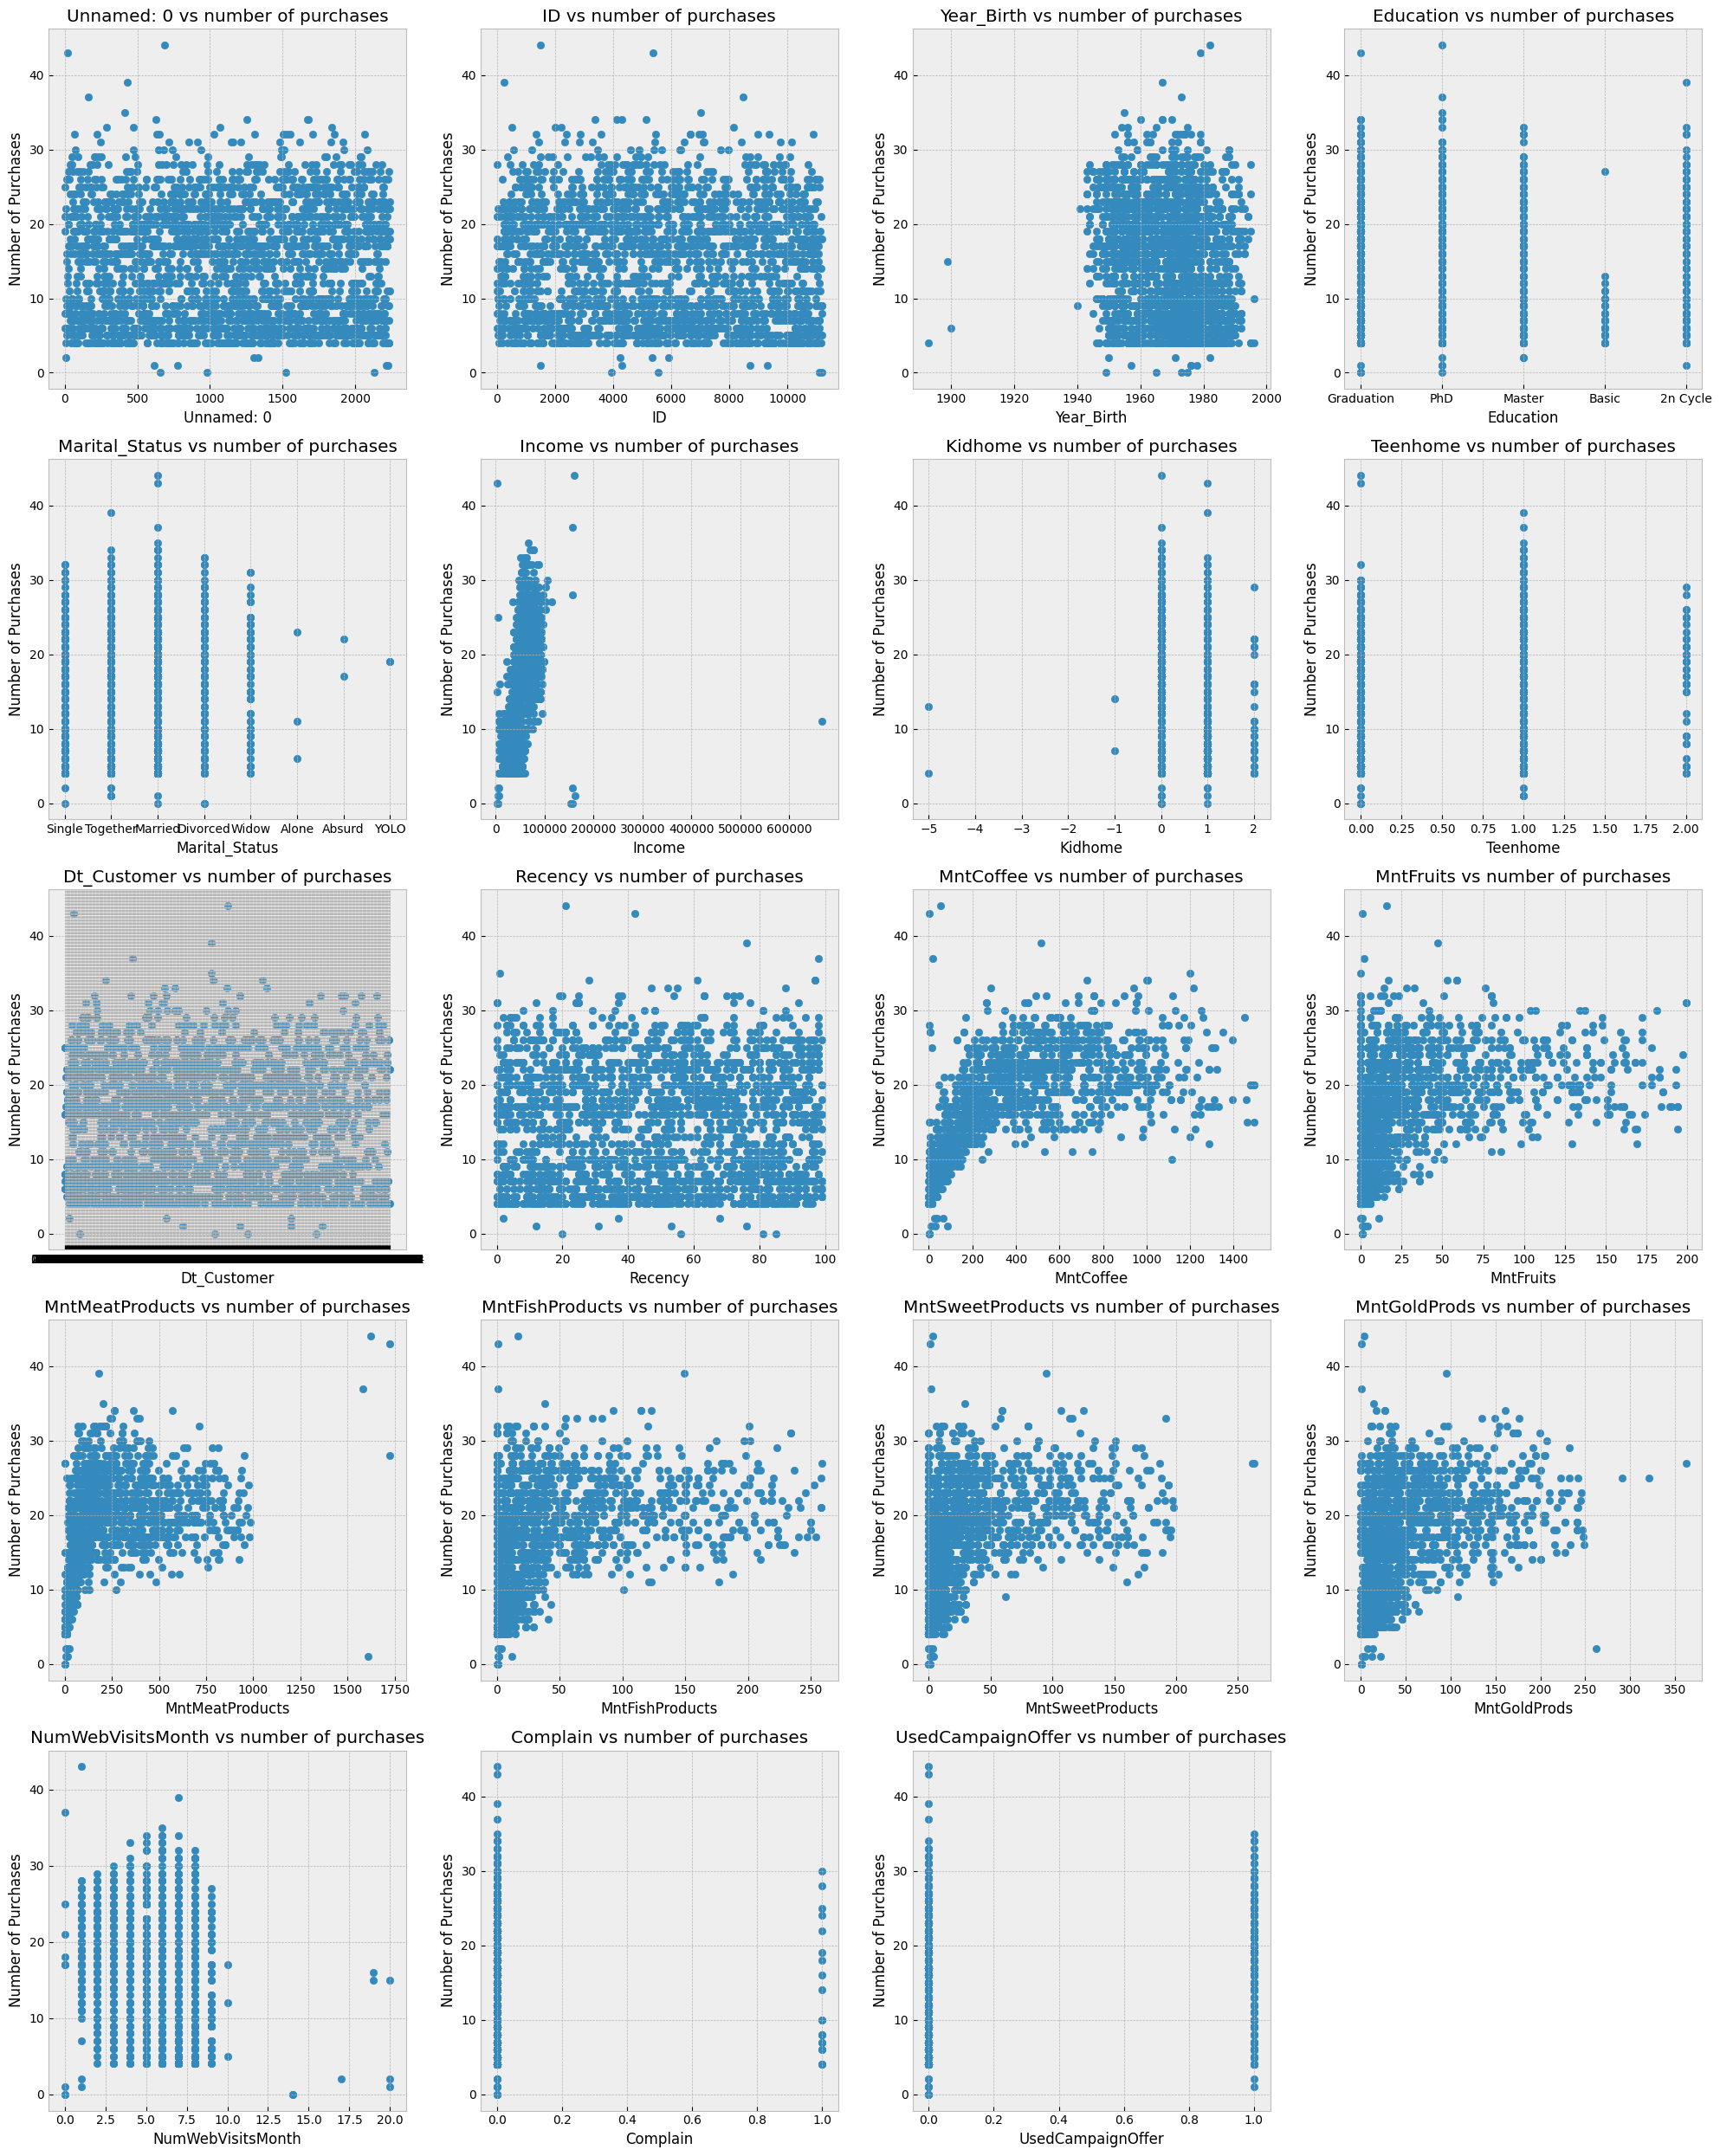

In [223]:
print(X.shape)
visualize_scatter(X, Y, column_names)

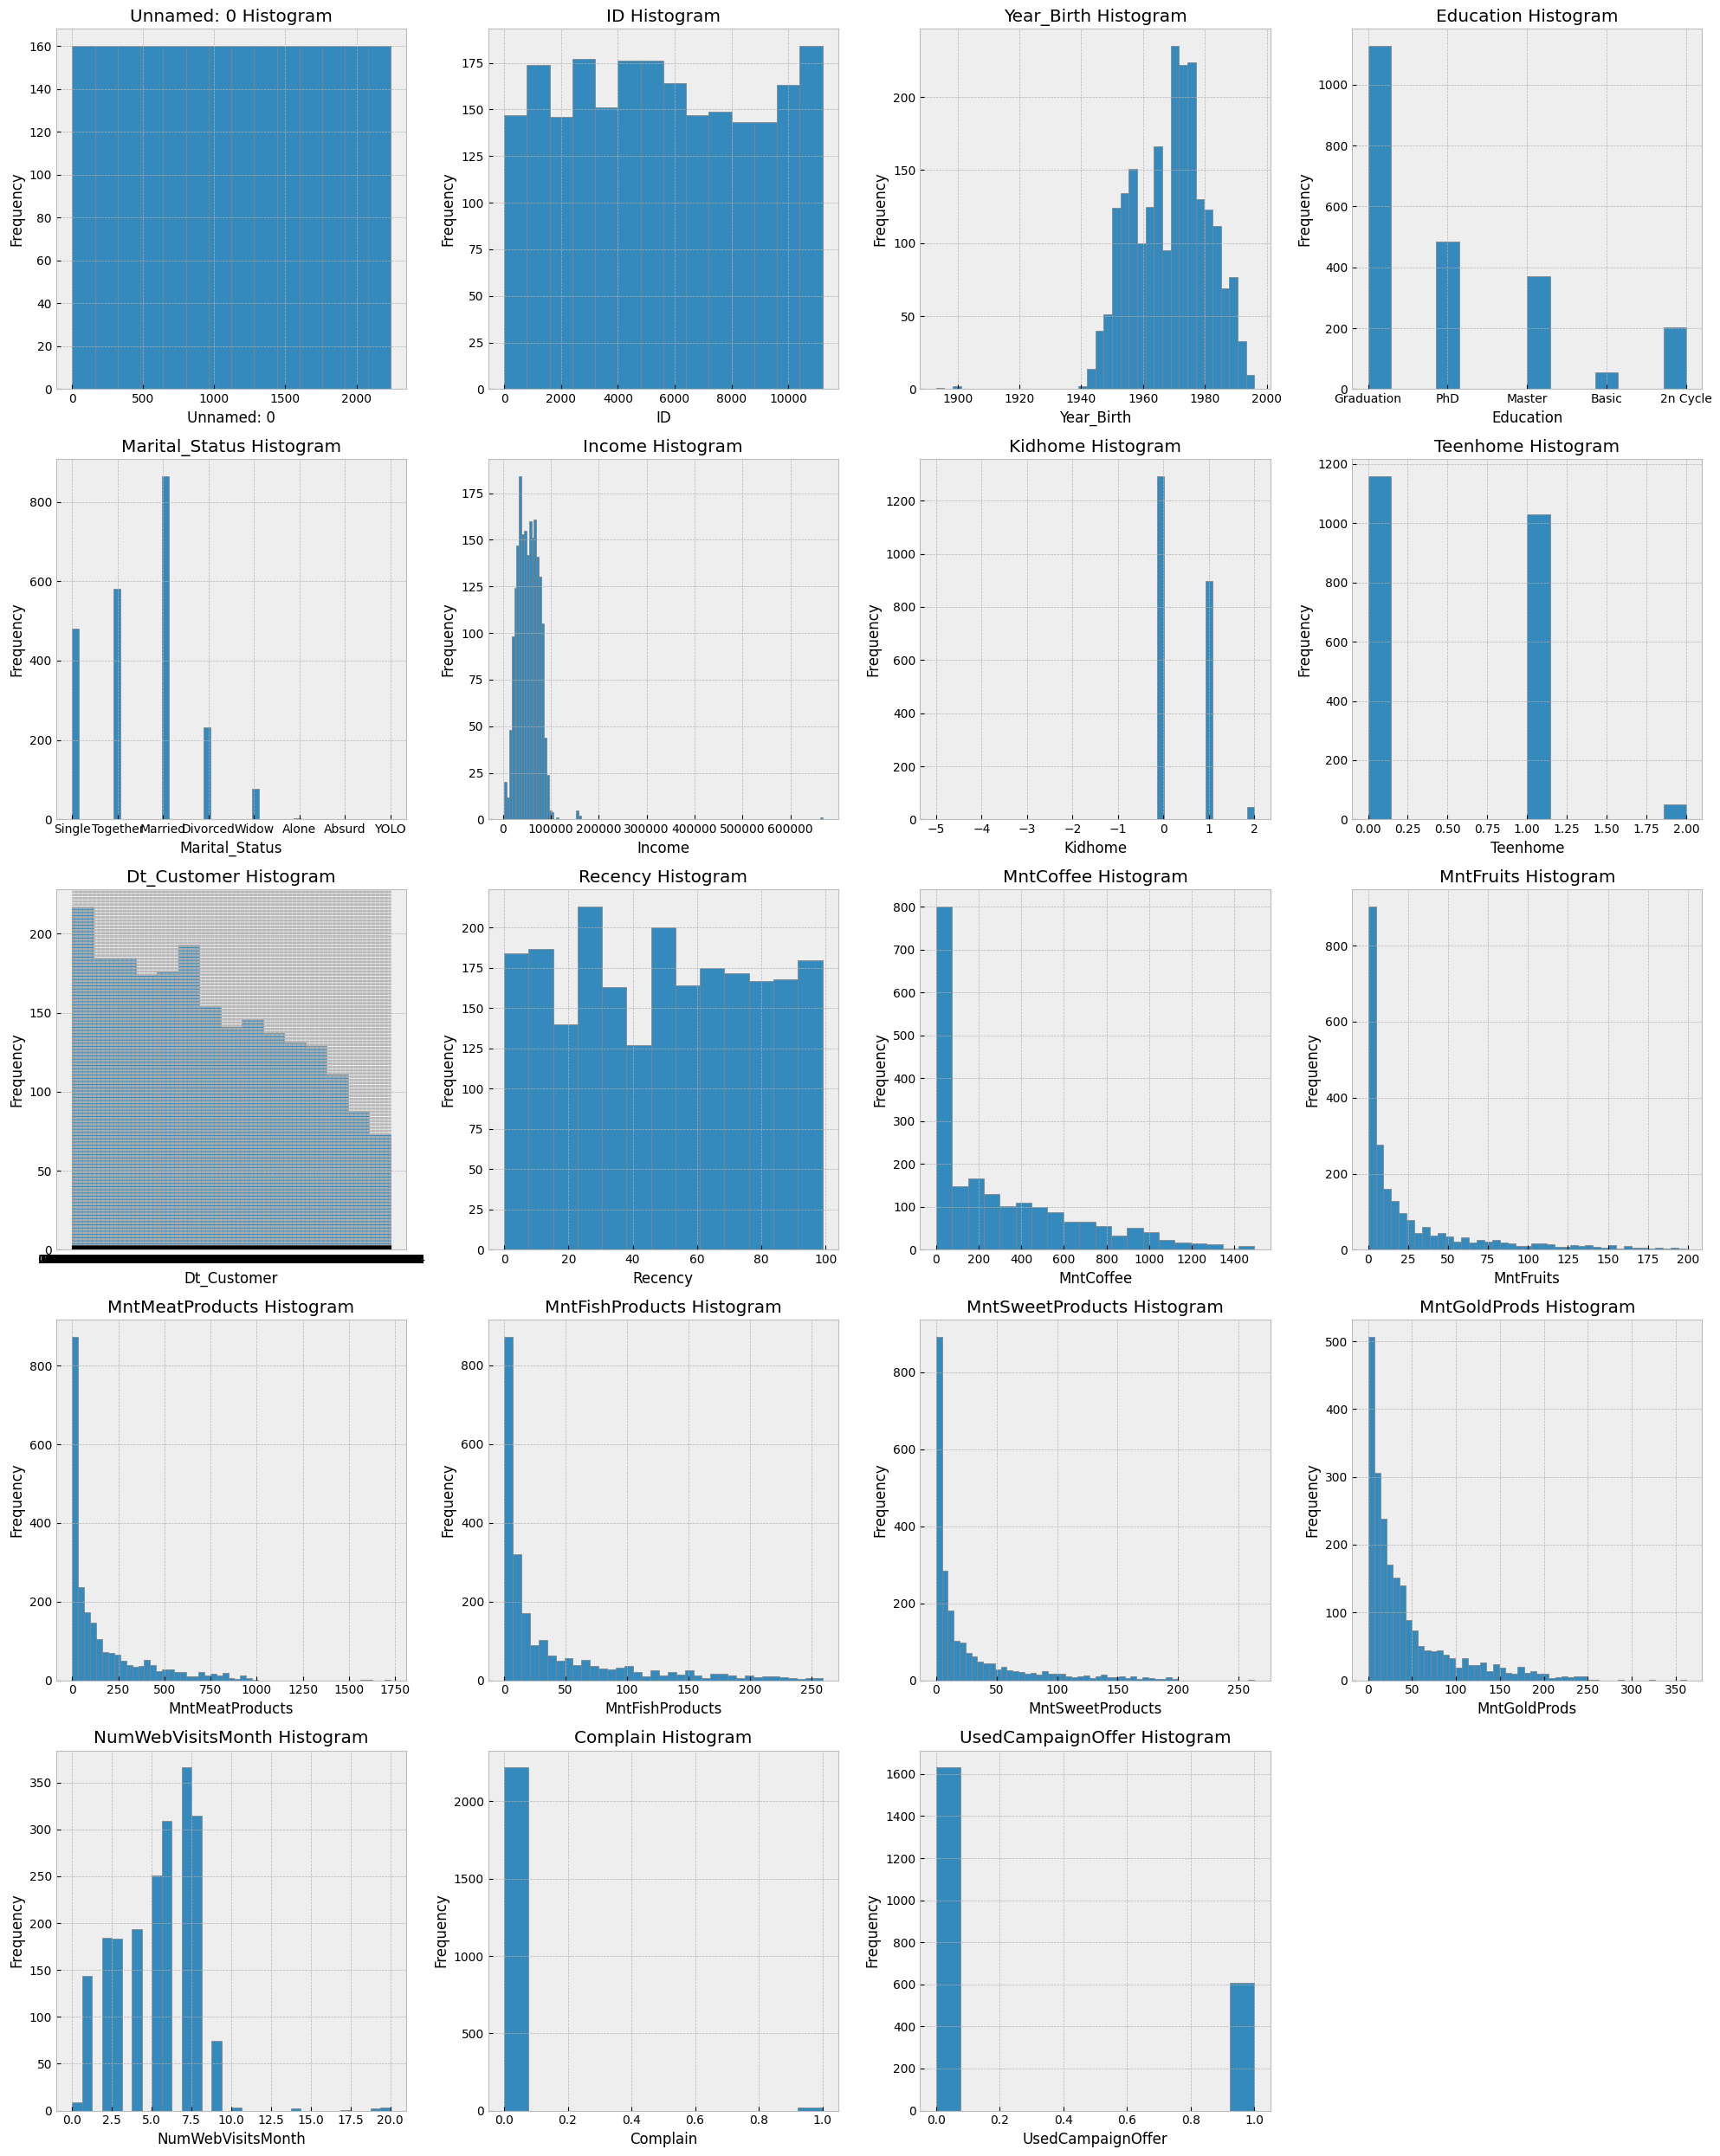

In [224]:
visualize_histogram(X, column_names)

Looking at the scatterplots, it is evident that the feature "Income" would be suitable for the task of linear regression since the data in the scatterplot seem to be linearly correlated. In other words, the data look like the follow a linear pattern and we can fit a line through these points. Features such whose names start with "Mnt" look like good candidates for the feature selection as well. Especially, "MntCoffee" feature.

Other features mostly do not have this linear pattern, although some are more linear than others. Perhaps some of these features coupled with other can produce linear patterns (hyperlinear?).

The histograms on the other hand just like the scatterplots, provide good tools for getting more familiar with the dataset. For instance, we can see that the dataset contains mostly people born anywhere from 1950s to 1990s. Looking at the scatterplots though, there does not seem to be a strict correlation between year of birth and the number of purchases. As another example, we can from the histograms that people in this dataset are mostly marrried people followed by people who have identified themselves as "together" and "single".

Also, take note of some features such as the ID which are just random numbers with no meanings and thus, not really helpful here. Here, "Unnamed" was counted as a feature only due to the reading of the data, it has no importance and it is okay for it to be removed.

**Missing Data:** Now we find the percentage of missing data in each feature.

In [225]:
def calculate_missing_data_percentage(data):
    # Calculate the percentage of missing data for each feature
    missing_data_percentage = data.isnull().mean() * 100
    missing_data_df = pd.DataFrame({
        'Feature': missing_data_percentage.index,
        'Percentage Missing': missing_data_percentage.values
    })
    
    # Sort the DataFrame by percentage missing in descending order
    missing_data_df = missing_data_df.sort_values(by='Percentage Missing', ascending=False)
    
    return missing_data_df

missing_data = calculate_missing_data_percentage(df)
missing_data

,Feature,Percentage Missing
5,Income,9.955357
10,MntCoffee,9.151786
16,NumWebVisitsMonth,8.928571
15,MntGoldProds,0.580357
11,MntFruits,0.000000
18,NumPurchases,0.000000
17,Complain,0.000000
14,MntSweetProducts,0.000000
13,MntFishProducts,0.000000
12,MntMeatProducts,0.000000


Since, a feature such as "Income" is a feature of interest that we are later going to use in the training of our linear regression model, we are going to handle its missing values. This will be done in the preprocessing section.

Another great method for seeing the correlation of the features and target variable, is the use of Pierson's correlation coefficient. A correlation measures the strength of the linear relation between $x$ and $y$. The stronger the correlation is, the better $x$ predicts $y$
$$
\hat{y}=\hat{\beta}_0+\hat{\beta}_1 x
$$

A correlation coefficient close to 1 or -1 would indicates great predictibility and linear correlation.

In [226]:
def visualize_correlation_matrix(df, target_column):
    plt.style.use("default")
    # Compute the correlation matrix
    corr_matrix = df.corr()

    # Focus on correlations with the target column
    target_corr = corr_matrix[[target_column]].sort_values(by=target_column, ascending=False)

    # Plotting the heatmap
    plt.figure(figsize=(8, 12))
    heatmap = sns.heatmap(target_corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, cbar_kws={'label': 'Correlation coefficient'})
    heatmap.set_title(f'Feature Correlation Coefficient with {target_column}')
    # plt.savefig("heatmap.png", dpi=200)
    plt.show()

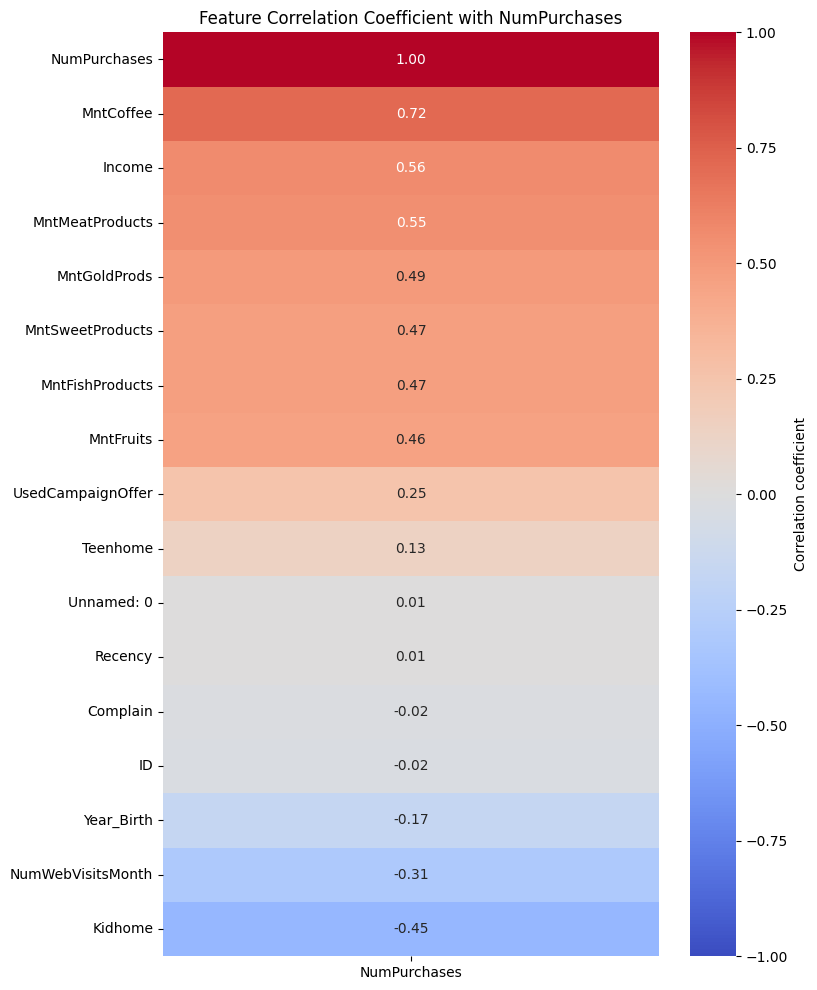

In [227]:
visualize_correlation_matrix(df, "NumPurchases")

Looking at this heatmap, we can see that MntCoffee, Income, and MntMeatProducts are good features to choose.

As for the correlation between the features, plotting each pair would be too much. So we will provide their correlation matrix.

In [228]:
def get_correlation_matrix(df):
    # Calculate the correlation matrix
    correlation_matrix = df.corr()
    return correlation_matrix

correlation_matrix = get_correlation_matrix(df)
print(correlation_matrix)

                   Unnamed: 0        ID  Year_Birth    Income   Kidhome  \
Unnamed: 0           1.000000 -0.006971    0.005586  0.016640 -0.014550   
ID                  -0.006971  1.000000    0.000028  0.015702  0.003254   
Year_Birth           0.005586  0.000028    1.000000 -0.161613  0.218619   
Income               0.016640  0.015702   -0.161613  1.000000 -0.399894   
Kidhome             -0.014550  0.003254    0.218619 -0.399894  1.000000   
Teenhome             0.036062 -0.002580   -0.352111  0.020794 -0.025655   
Recency              0.000004 -0.046524   -0.019871 -0.000913  0.015477   
MntCoffee           -0.003251 -0.020890   -0.174639  0.558439 -0.478746   
MntFruits            0.024295  0.004600   -0.017917  0.421018 -0.352588   
MntMeatProducts      0.000679 -0.004437   -0.030872  0.571929 -0.418982   
MntFishProducts      0.007842 -0.024475   -0.041625  0.429283 -0.365663   
MntSweetProducts    -0.006920 -0.007642   -0.018133  0.430048 -0.350450   
MntGoldProds         0.01

## Preprocessing and Normalization
In this step, we first handle the missing values. As we saw before features Income, MntCoffee, NumWebVisitsMonth, and MntGoldProds have missing data. To handle these data, with remove the row of data that have missing values.

In [229]:
df_removed = df.dropna()
data_rmv = df_removed.to_numpy()

Bear in mind that later we are also going to perform z-score normalization on the three features that we are later going to use in training our model, using the following function:

In [230]:
def zscore_normalize(X):
    # Check data type and ensure it's appropriate for calculations
    if not np.issubdtype(X.dtype, np.number):
        print(X)
        raise TypeError("Input must be a numeric numpy array")
    
    # Calculate the needed statistics, safely ignoring NaN values
    mean = np.nanmean(X, axis=0)
    std = np.nanstd(X, axis=0)
    
    # Avoid division by zero by setting std of 0 to 1 (or add a small epsilon, std + 1e-10)
    std[std == 0] = 1
    
    # Z-score normalization formula
    X_norm = (X - mean) / std
    
    return X_norm

After this, we split the data into training/test sets with proportions of 80/20.

In [231]:
X_rmv = np.delete(data_rmv, 18, axis=1)
Y_rmv = data_rmv[:, 18].reshape(-1).astype(int)

# Create a mask for splitting
np.random.seed(30)
numzero = int(0.2 * X_rmv.shape[0])
mask = np.array([0] * numzero + [1] * (X_rmv.shape[0] - numzero))
np.random.shuffle(mask)

# Split into train/test
X_train = X_rmv[mask==1]
X_test = X_rmv[mask==0]

Y_train = Y_rmv[mask==1]
Y_test = Y_rmv[mask==0]

## Simple Linear Regression - Analytical Solution
First, we have to choose which feature we are going to utilize. In the analysis done in the EDA section on the scatterplots and the correlation heatmap, we saw that the "MntCoffee" feature was ever present as a good choice. So we choose this feature. Coming in at second, we have the "income" feature.

One might say that "Income" should be the feature we choose due to the intuition that with more the income someone has, there should also be more purchases. This is not always true. It could also be possible that people with higher income brackets may choose to shop in other shops, perhaps shops and markets more fitting of their statues.

Thus, as a result of the high correlation coefficient and linear pattern seen in its scatterplot we choose "MntCoffee".


Now, we are going to find an analytical solution to the simple linear regression model (linear regression with one variable) of,

$$h_{a, b}(x) = a x + b,$$

where $a$ is the weight (coefficient or slope) and $b$ is the bias (intercept). 

Solving for $a,b$ for which the RMSE is minimized involves solving a system of linear equations. This is equivalant to the use of the least squares method for solving simple linear regressions models.

This method involves,
\begin{equation}
\begin{gathered}
a=\frac{n\left(\sum x y\right)-\left(\sum x\right)\left(\sum y\right)}{n\left(\sum x^2\right)-\left(\sum x\right)^2} \\
b=\frac{\left(\sum y\right)\left(\sum x^2\right)-\left(\sum x\right)\left(\sum x y\right)}{n\left(\sum x^2\right)-\left(\sum x\right)^2}
\end{gathered}
\end{equation}

In [232]:
def least_squares(x, y):
      n = len(x)
      a = (n * np.sum(x*y) - np.sum(x) * np.sum(y)) / (n * np.sum(x**2) - (np.sum(x))**2)
      b = (np.sum(y) * np.sum(x**2) - np.sum(x) * np.sum(x*y)) / (n * np.sum(x**2) - (np.sum(x))**2)
      return a, b

def predict(x, a, b):
      return np.array([_predict(x_i, a, b) for x_i in x])

def _predict(x, a, b):
      return a * x + b

# Choose input feature
x_train = X_train[:, 10].flatten().astype(float)
y_train = Y_train.astype(float)

x_test = X_test[:, 10].flatten().astype(float)
y_test = Y_test.astype(float)

# Get optimal coefficients
a, b = least_squares(x_train, y_train)

# Predict
y_pred = predict(x_test, a, b)

print(f"Coefficients: a = {a}, b = {b}")

Coefficients: a = 0.01632290023238516, b = 10.056706389545027


We are then going to evaluate the performace of the solution using RMSE and R2 score.

In [233]:
def calculate_rmse(true, pred):
    # Compute the mean squared error (MSE)
    mse = np.mean((true - pred) ** 2)
    
    # Take the square root of MSE to get RMSE
    rmse = np.sqrt(mse)
    
    return rmse

def calculate_r2_score(true, pred):
    variance_sum = np.sum((true - np.mean(true)) ** 2)
    
    # Calculate the residual sum of squares (RSS)
    rss = np.sum((true - pred) ** 2)
    
    r2_score = 1 - (rss / variance_sum)
    
    return r2_score

In [234]:
print("Test RMSE = ", calculate_rmse(y_test, y_pred))
print("Test R2 Score = ", calculate_r2_score(y_test, y_pred))

Test RMSE =  5.056816676775882
Test R2 Score =  0.5589262191444717


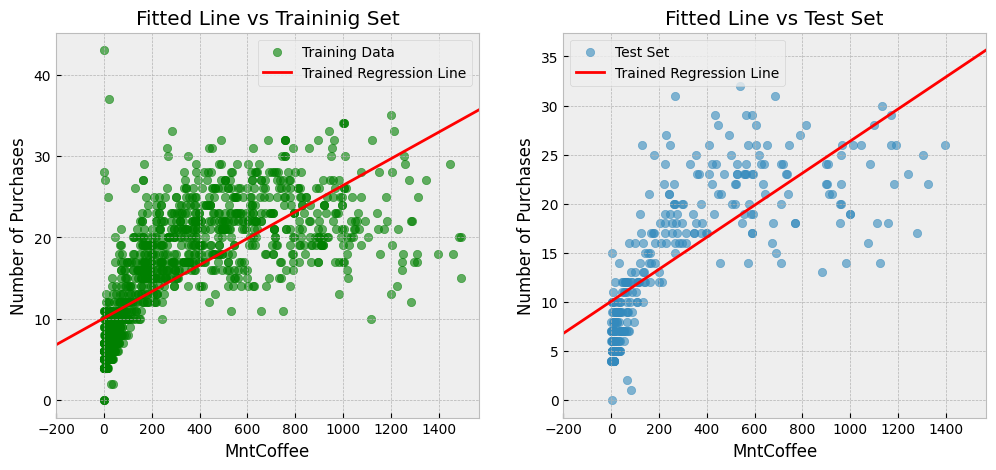

In [282]:
left_lim = -200
right_lim = 1.05 * np.max(x_train)

plt.style.use("bmh")

range_vals = np.linspace(left_lim, right_lim, 10000)
y = a * range_vals + b

fig, ax = plt.subplots(1, 2, figsize=(12,5))
ax[1].scatter(x_test, y_test, alpha=0.6, label="Test Set")
ax[0].scatter(x_train, y_train, alpha=0.6, color="green", label="Training Data")
ax[1].plot(range_vals, y, linewidth=2, color="red", label="Trained Regression Line")
ax[0].plot(range_vals, y, linewidth=2, color="red", label="Trained Regression Line")
ax[0].set_title("Fitted Line vs Traininig Set")
ax[1].set_title("Fitted Line vs Test Set")
ax[0].set_xlim(left_lim, right_lim)
ax[1].set_xlim(left_lim, right_lim)
ax[0].set_xlabel("MntCoffee")
ax[1].set_xlabel("MntCoffee")
ax[0].set_ylabel("Number of Purchases")
ax[1].set_ylabel("Number of Purchases")
ax[0].legend()
ax[1].legend()
plt.show()

In this line you can observe the fitted line vs the training and test data using this feature.

## Multiple Variable Linear Regression

In this section, we use three features for the linear regression task. We choose features "MntCoffee", "Income", and "MntMeatProducts", due to them having the closest correlation coefficients to 1 and also due to the linear-like pattern seen in their respective scatterplots.

Additionally, we are going to apply z-score normalization on this new three-feature training set. This so that they are similarly scaled and the training time is reduced (as explained in the previous problem).

In [235]:
# Preparing the data

# Feature selection
data1 = X_train[:, [5, 10, 12]].astype(float)
data2 = X_test[:, [5, 10, 12]].astype(float)

# Z-score scaling normalization on both the training and test sets
X_training = zscore_normalize(data1)
X_testing = zscore_normalize(data2)

In [252]:
def cost(true, pred):
    return calculate_rmse(true, pred)

def model(w, X, b):
    return [np.dot(w, x) + b for x in X]

def add_intercept(X):
    # To ease intercept into the coefficients vector
    intercept = np.ones((X.shape[0], 1))
    return np.concatenate((intercept, X), axis=1)

def model(X, theta):
    return np.dot(X, theta)


def gradient_descent(X, y, alpha=0.01, iterations=100000):
    n, f = X.shape
    
    # Initialize the coefficients with zeros
    theta = np.zeros(f)

    # Array for plotting the learning curve
    errors = []
    
    for _ in range(iterations):
        y_pred = model(X, theta)
        error = y_pred - y
        
        # Gradient calculation
        gradient = (1 / n) * X.T.dot(error)
        
        # Update rule
        theta -= alpha * gradient
        
        # Calculate cost
        cost = calculate_rmse(y, y_pred)
        errors.append(cost)
        
        if _ % (iterations / 100) == 0:
            print(f"Iteration {_}: RMSE = {cost}")
    
    # Plot the learning curve
    visualize_learning_curve(errors)
    
    return theta

def visualize_learning_curve(errors):
    plt.plot(errors, label="Learning Curve")
    plt.title("Learning Curve of the Gradient Descent")
    plt.xlabel("Iteration")
    plt.ylabel("Cost")
    plt.legend()
    plt.grid(True)
    plt.show()

def predict_multi_regression(X, theta):
    return [model(x, theta) for x in X]

Iteration 0: RMSE = 16.949089438864306
Iteration 10: RMSE = 15.33288124407139
Iteration 20: RMSE = 13.930264363020816
Iteration 30: RMSE = 12.710187487577356
Iteration 40: RMSE = 11.647421347424434
Iteration 50: RMSE = 10.721250145228868
Iteration 60: RMSE = 9.914451562101537
Iteration 70: RMSE = 9.212506343335559
Iteration 80: RMSE = 8.602990357221355
Iteration 90: RMSE = 8.07511211521641
Iteration 100: RMSE = 7.6193667051298375
Iteration 110: RMSE = 7.227282871901717
Iteration 120: RMSE = 6.891243847391655
Iteration 130: RMSE = 6.604365014605491
Iteration 140: RMSE = 6.36041326839976
Iteration 150: RMSE = 6.153754633297152
Iteration 160: RMSE = 5.979318723992348
Iteration 170: RMSE = 5.8325710760497484
Iteration 180: RMSE = 5.70948704874369
Iteration 190: RMSE = 5.6065235841027965
Iteration 200: RMSE = 5.5205872859861636
Iteration 210: RMSE = 5.448998872008587
Iteration 220: RMSE = 5.389455012963243
Iteration 230: RMSE = 5.33998899371434
Iteration 240: RMSE = 5.298931654116937
Iterat

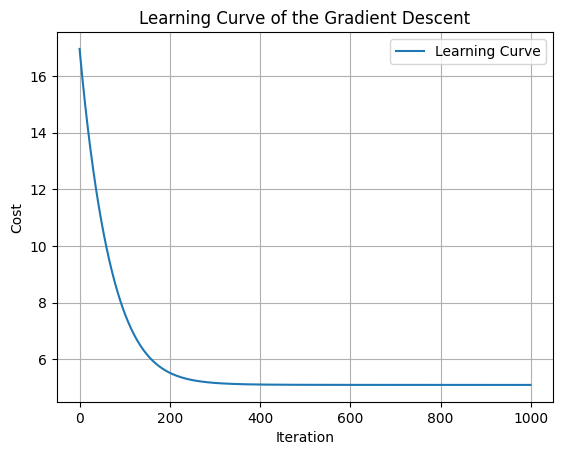

In [247]:
# Add intercept
X_training1 = add_intercept(X_training)

# Learn the weights
theta = gradient_descent(X_training1.astype(float), Y_train.astype(float), iterations=1000)

In [248]:
# Weight values
print(theta)

[15.10845231  1.09080616  4.15405216  1.37614182]


In [254]:
# Add intercept to test design matriix
X_testing1 = add_intercept(X_testing)

# Predict test set
Y_pred = predict_multi_regression(X_testing1, theta)

# Find the test error
print("Test RMSE = ", calculate_rmse(Y_test, Y_pred))
print("Test R2 Score = ", calculate_r2_score(Y_test, Y_pred))

Test RMSE =  5.003213729401394
Test R2 Score =  0.5682275434449253


As we can see, this model performs better when compared to the previous model. This is probably mainly due to consideration of three features vs only one. This allows for the model to learn more about the data and thus fit a more accurate line. Although the second model has outperformed the first model, it has not done it by too much of a margin and they are close. Both are acceptable models.

A consideration for the future could be to train higher degree polynomials to fit the data. For instance, looking at the scatter plots of section (as) we can see that a quadratic polynomial would fit the data better. Another interesting idea would be to try and detect the outliers and prune them. But these are all outside of the interests of this project specifically.